In [2]:
%pip install matplotlib

  Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (305 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)

## 客户数据分析
1024 Byte 之后就是 每毫秒ms 采集到的电压值的排列，2Bytes 代表一个电压数值，单位是  (1/200)mV, 即 5uV， 

网络参考：
16位的有符号整数使用二进制补码表示法，可以表示的数值范围是 -32768 到 32767。补码表示法是现代计算机系统中普遍采用的方式。
补码表示法的概念：
正数：与无符号表示相同，最高位是0。
负数：通过取反加一得到（也就是反码加1），最高位是1。
具体例子：

正数表示：
0000 0000 0000 0000 表示 0  
0000 0000 0000 0001 表示 1  
0111 1111 1111 1111 表示 32767  
负数表示：  
1111 1111 1111 1111 表示 -1  
1111 1111 1111 1110 表示 -2  
1000 0000 0000 0000 表示 -32768  

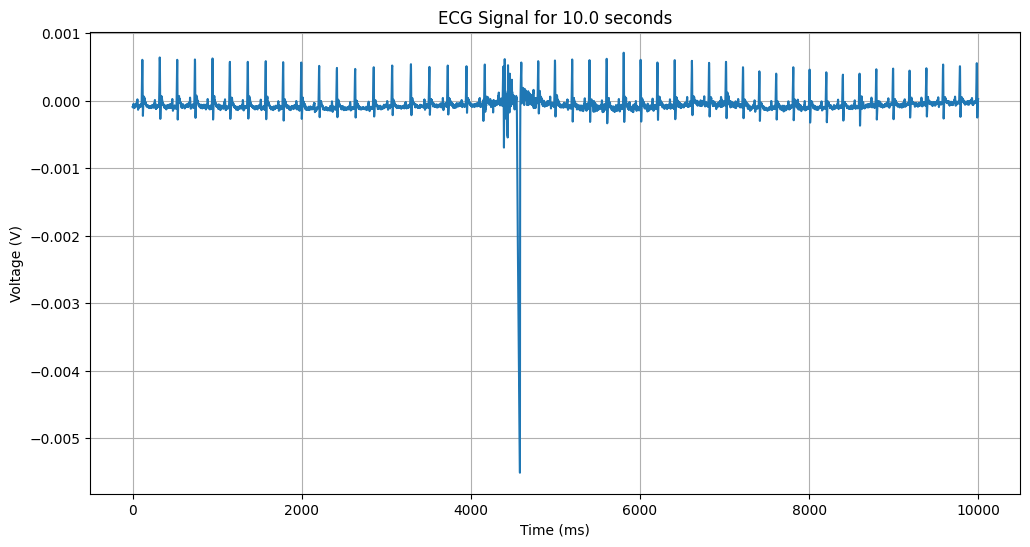

In [3]:
import struct
import matplotlib.pyplot as plt

def read_lry_file(file_path):
    with open(file_path, 'rb') as file:
        # 跳过前 1024 字节的文件头
        file.seek(1024)
        
        # 读取剩余的字节，2 字节代表一个电压值
        data = file.read()
        
        # 将字节数据转换为电压值列表
        voltage_values = []
        for i in range(0, len(data), 2):
            # 每两个字节转换为一个短整型数值
            voltage_value = struct.unpack('<h', data[i:i+2])[0]
            # 将数值转换为电压值，单位是 5uV (1/200)mV
            voltage_values.append(voltage_value * 5e-6)
            
    return voltage_values

def plot_ecg(voltage_values, output_file, duration_ms):
    # 只取前 duration_ms 毫秒的数据
    sampled_values = voltage_values[:duration_ms]
    
    # 生成时间轴，单位是毫秒
    time = [i for i in range(len(sampled_values))]
    
    # 绘制心电图
    plt.figure(figsize=(12, 6))
    plt.plot(time, sampled_values)
    plt.title(f'ECG Signal for {duration_ms / 1000} seconds')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (V)')
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()

# 文件路径
lry_file_path = 'ecg_usercase1_24.lry'
# 输出图像文件路径
output_image_path = 'ecg_output_10s.png'
# 设定输出的时长为 10 秒 (10000 毫秒)
duration_ms = 10000

# 读取并解析 .lry 文件
voltage_values = read_lry_file(lry_file_path)

# 绘制并保存 ECG 图像 (10 秒)
plot_ecg(voltage_values, output_image_path, duration_ms)
